Accuracy on logistic test: 0.7307692307692307
Accuracy on randomforest test: 0.6410256410256411
Accuracy on randomforest test with more features: 0.7371794871794872
Accuracy on logistic test: 0.7307692307692307
Accuracy on randomforest test: 0.6410256410256411
Accuracy on randomforest test with more features: 0.7371794871794872
Accuracy on logistic test: 0.7307692307692307
Accuracy on randomforest test: 0.6410256410256411
Accuracy on randomforest test with more features: 0.7371794871794872
Accuracy on logistic test: 0.7307692307692307
Accuracy on randomforest test: 0.6410256410256411
Accuracy on randomforest test with more features: 0.7371794871794872
Accuracy on logistic test: 0.7307692307692307
Accuracy on randomforest test: 0.6410256410256411
Accuracy on randomforest test with more features: 0.7371794871794872
Accuracy on logistic test: 0.7307692307692307
Accuracy on randomforest test: 0.6410256410256411
Accuracy on randomforest test with more features: 0.7371794871794872
Accuracy o

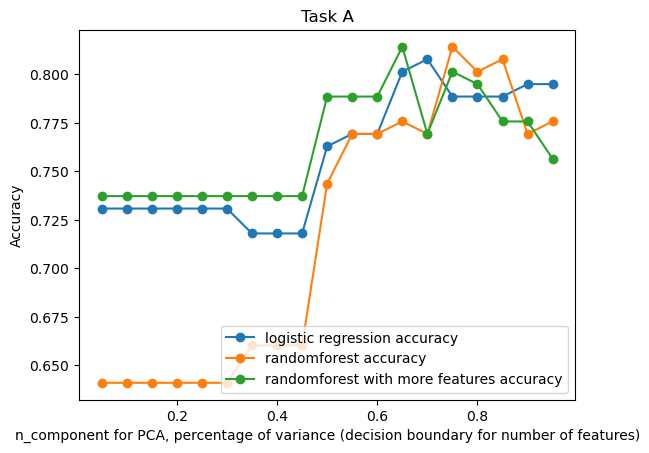

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
import sklearn.model_selection
import sklearn.ensemble

data = np.load('../Datasets/breastmnist.npz')

# assign data to train, validation, and test sets. Normalize the pixel value. 
train_data = data['train_images']/255 
train_label = data['train_labels']
val_data = data['val_images']/255
val_label = data['val_labels']
test_data = data['test_images']/255
test_label = data['test_labels']

def flatten_data(train_data, test_data, val_data, n_component=0.9):
    """
    Flatten the image data to 1D for linear models an use PCA for dimensionality reduction. 
    The [number of imfages, 28, 28] image data are reshaped to [number of imfages, 28*28], 
    and PCA is used to reduce the dimension of 784. When n_component>=1, it is the number of
    the dimension. While 0<n_component<1, it means the percentage boundary of variance.
    
    Args:
        train_data(numpy array): train data of 2D grayscale image (num_samples, height, width)
        val_data(numpy array): validation data of 2D grayscale image (num_samples, height, width)
        test_data(numpy array): test data of 2D grayscale image (num_samples, height, width)
        n_component(int, float) default=0.9: PCA n_component input
    
    Returns:
        train_flattened(numpy array): train data in shape of (num_samples, num_features)
        val_flattened(numpy array): validation data in shape of (num_samples, num_features)
        test_flattened(numpy array): test data in shape of (num_samples, num_features)
    """

    train_flattened = train_data.reshape(train_data.shape[0], -1)
    pca = PCA(n_components=n_component)
    train_flattened = pca.fit_transform(train_flattened)

    val_flattened = val_data.reshape(val_data.shape[0], -1)
    val_flattened = pca.transform(val_flattened)

    test_flattened = test_data.reshape(test_data.shape[0], -1)
    test_flattened = pca.transform(test_flattened)

    return train_flattened, val_flattened, test_flattened

def logistic_regression(train_data,train_label,test_data):
    """
    Implement logistic regression training on train_flattened data and train_label.
    Predict pred_label based on test_flattened and return it

    Args: 
        train_data(numpy array): Data for train
        train_label(numpy array): The train labels
        test_data(numpy array): Data for test

    Returns:
        pred_label(numpy array): Predicted labels for test data
    """
    # Define logistic regression and parameter grid
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    logreg = sklearn.linear_model.LogisticRegression(solver='lbfgs',penalty='l2',max_iter=100)
    grid = sklearn.model_selection.GridSearchCV(logreg, param_grid, cv=5)
    grid.fit(train_data,train_label.ravel())
    # Make predictions
    pred_label = grid.predict(test_data)
    return pred_label

def randomforestclassify(train_data,train_label,test_data):
    """
    Implement randomforest training on train_flattened data and train_label.
    Predict pred_label based on test_flattened and return it

    Args: 
        train_data(numpy array): Data for train
        train_label(numpy array): The train labels
        test_data(numpy array): Data for test

    Returns:
        pred_label(numpy array): Predicted labels for test data
    """
    randf = sklearn.ensemble.RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=2,random_state=42)
    randf.fit(train_data,train_label.ravel())
    pred_label = randf.predict(test_data)
    return pred_label

def add_features(original_data,flattened_data):
    """
    Add statistical features (mean and STD) of the original data
    to the flattened data 

    Args:
        original_data(numpy array): The original non-flattened data
        flattened_data(numpy array): The flattened and dimension-reduced data

    Returns:
        new_data(numpy array): the flattened_data combine with mean and STD features
        for each sample(image)
    """
    new_data=[]
    original_data = original_data.reshape(original_data.shape[0], -1)
    for data1, data2 in zip(original_data,flattened_data):
        new_feature = np.concatenate((data2,[np.mean(data1),np.std(data1)]))
        new_data.append(new_feature)
    return np.array(new_data)

n_components = np.arange(0.05, 1, 0.05)
logistic_accuracy = []
randomforest_accuracy1 = []
randomforest_accuracy2 = []

for n_component in n_components:
    train_flattened, val_flattened, test_flattened = flatten_data(train_data, test_data, val_data, n_component)

    pred_label = logistic_regression(train_flattened,train_label,test_flattened)
    accuracy = sklearn.metrics.accuracy_score(test_label, pred_label)
    print('Accuracy on logistic test: '+str(accuracy))
    logistic_accuracy.append(accuracy)

    pred_label1 = randomforestclassify(train_flattened,train_label,test_flattened)
    accuracy1 = sklearn.metrics.accuracy_score(test_label, pred_label1)
    print('Accuracy on randomforest test: '+str(accuracy1))
    randomforest_accuracy1.append(accuracy1)

    pred_label2 = randomforestclassify(add_features(train_data,train_flattened),train_label,add_features(test_data,test_flattened))
    accuracy2 = sklearn.metrics.accuracy_score(test_label, pred_label2)
    print('Accuracy on randomforest test with more features: '+str(accuracy2))
    randomforest_accuracy2.append(accuracy2)

plt.plot(n_components,logistic_accuracy,'o-',label='logistic regression accuracy')
plt.plot(n_components,randomforest_accuracy1,'o-',label='randomforest accuracy')
plt.plot(n_components,randomforest_accuracy2,'o-',label='randomforest with more features accuracy')
plt.xlabel("n_component for PCA, percentage of variance (decision boundary for number of features)")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Task A")
plt.show()
